In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/what na.csv")

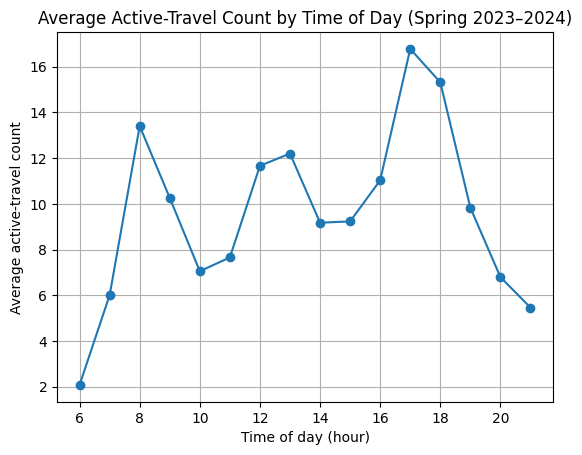

In [2]:
# Average count by hour
avg_time = df.groupby("Time")["Count"].mean().reset_index()

plt.figure()
plt.plot(avg_time["Time"], avg_time["Count"], marker="o")
plt.xlabel("Time of day (hour)")
plt.ylabel("Average active-travel count")
plt.title("Average Active-Travel Count by Time of Day (Spring 2023–2024)")
plt.grid(True)
plt.show()


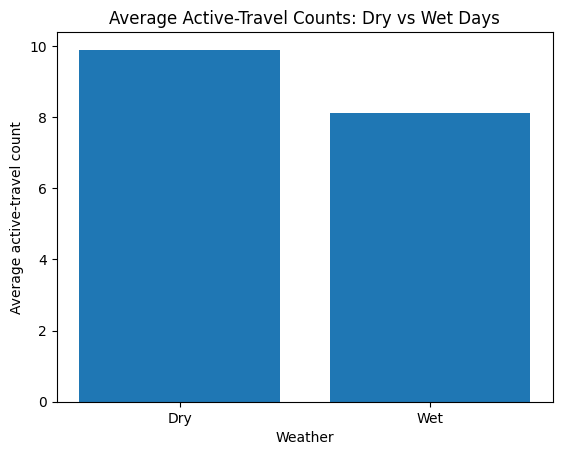

In [3]:
# Map 0/1 to labels
df["Weather_label"] = df["Weather"].map({0: "Dry", 1: "Wet"})

avg_weather = df.groupby("Weather_label")["Count"].mean().reset_index()

plt.figure()
plt.bar(avg_weather["Weather_label"], avg_weather["Count"])
plt.xlabel("Weather")
plt.ylabel("Average active-travel count")
plt.title("Average Active-Travel Counts: Dry vs Wet Days")
plt.show()


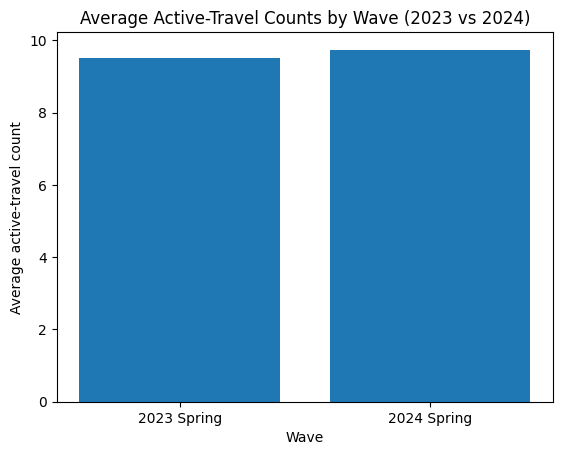

In [4]:
df["Wave_label"] = df["Wave"].map({0: "2023 Spring", 1: "2024 Spring"})
avg_wave = df.groupby("Wave_label")["Count"].mean().reset_index()

plt.figure()
plt.bar(avg_wave["Wave_label"], avg_wave["Count"])
plt.xlabel("Wave")
plt.ylabel("Average active-travel count")
plt.title("Average Active-Travel Counts by Wave (2023 vs 2024)")
plt.show()


In [5]:
# Regression coefficients (from your Excel output)
beta_0 = -0.384036955
beta_1 = -1.088070933   # Weather
beta_2 = 0.206234409    # Time
beta_3 = 0.006441027    # Date
beta_4 = -2.070318987   # Wave
beta_5 = 18.84394692    # High_dummy
beta_6 = 4.715214312    # Medium_dummy


In [7]:
import numpy as np

times = np.arange(6, 22)  # 6–21

scenarios = []

for t in times:
    # High site, Dry
    scenarios.append({
        "Time": t, "Weather": 0, "Date": 40, "Wave": 1,
        "High_dummy": 1, "Medium_dummy": 0, "Scenario": "High site – Dry"
    })
    # High site, Wet
    scenarios.append({
        "Time": t, "Weather": 1, "Date": 40, "Wave": 1,
        "High_dummy": 1, "Medium_dummy": 0, "Scenario": "High site – Wet"
    })
    # Low site, Dry (baseline)
    scenarios.append({
        "Time": t, "Weather": 0, "Date": 40, "Wave": 1,
        "High_dummy": 0, "Medium_dummy": 0, "Scenario": "Low site – Dry"
    })

scen_df = pd.DataFrame(scenarios)

# Predicted count from regression equation
scen_df["Predicted_Count"] = (
    beta_0
    + beta_1 * scen_df["Weather"]
    + beta_2 * scen_df["Time"]
    + beta_3 * scen_df["Date"]
    + beta_4 * scen_df["Wave"]
    + beta_5 * scen_df["High_dummy"]
    + beta_6 * scen_df["Medium_dummy"]
)


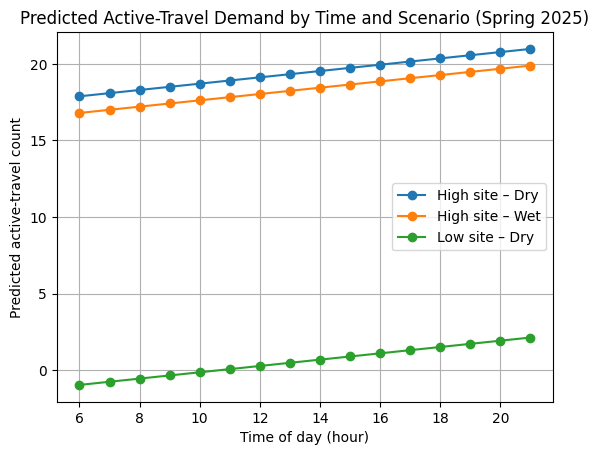

In [8]:
plt.figure()

for name, group in scen_df.groupby("Scenario"):
    plt.plot(group["Time"], group["Predicted_Count"], marker="o", label=name)

plt.xlabel("Time of day (hour)")
plt.ylabel("Predicted active-travel count")
plt.title("Predicted Active-Travel Demand by Time and Scenario (Spring 2025)")
plt.legend()
plt.grid(True)
plt.show()


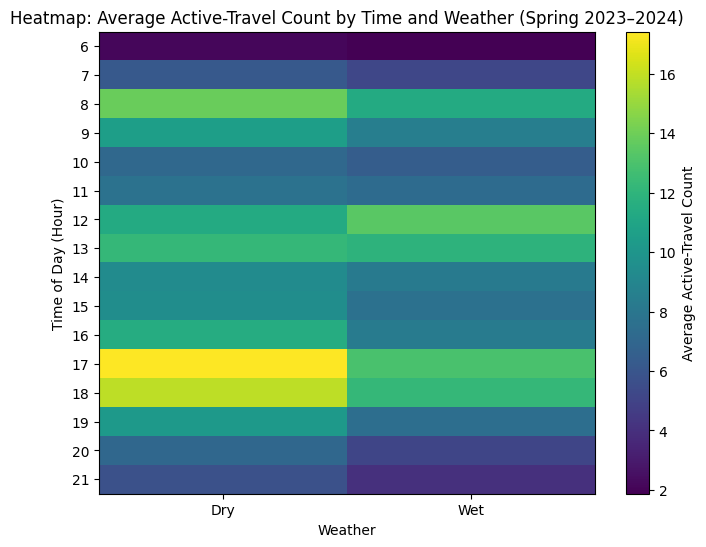

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert 0/1 weather to labels
df["Weather_label"] = df["Weather"].map({0: "Dry", 1: "Wet"})

# Pivot table: Time = rows, Weather = columns
pivot = df.pivot_table(
    index="Time",
    columns="Weather_label",
    values="Count",
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Average Active-Travel Count")

# Axis labels
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)

plt.xlabel("Weather")
plt.ylabel("Time of Day (Hour)")
plt.title("Heatmap: Average Active-Travel Count by Time and Weather (Spring 2023–2024)")

plt.show()
